#### Required Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Reading the dataset

In [2]:
df=pd.read_csv("Apps_data+(1).csv")

In [3]:
df.head(10) # Displays first 10 rows of data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


#### Checking the shape and info of the data.

In [4]:
df.shape

(10841, 13)

This dataset consists of 10841 rows and 13 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We see that five columns-Rating,Type,Content Rating,Current Ver,Android Ver contains null values. We also see that Rating is the only column which is of numeric datatype.

#### Checking summary statistics of the dataset.

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.describe(include="O").T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


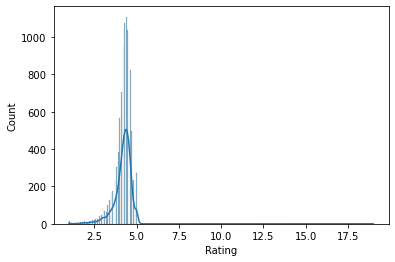

In [8]:
sns.histplot(df["Rating"],kde=True)
plt.show()

We observe that Rating column is slightly left-skewed and the mean is slightly less than median.

#### Checking for duplicate records in the dataset

In [9]:
df.duplicated().sum()

483

There are 483 duplicate rows in the dataset.

In [10]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [11]:
df.drop_duplicates(inplace=True) #To drop duplicate values

In [12]:
df.duplicated().sum()

0

#### Checking the 'Category' column 

In [13]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
df["Category"].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

We note that '1.9' is invalid category and it is present in only one row. So we drop it.

In [15]:
df.drop(df[df["Category"]=='1.9'].index,inplace=True) #Dropping the row where Category=1.9

In [16]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

#### Checking the Rating column

In [17]:
df["Rating"].isnull().sum()

1465

In [18]:
(df["Rating"].isnull().sum()/df.shape[0])*100

14.145022689968137

We see that around 14% of data in Rating column is null. We drop the records for which Rating column is null.

In [19]:
df.drop(df[df["Rating"].isnull()].index,inplace=True)

#### Creating a new column Rating_Category based on Rating column

We create a new categorical column called "Rating_category" based on "Rating". We categorize Rating as 'High' if Rating is greater than 3.5 and 'Low' if Rating less than or equal to 3.5

In [20]:
df["Rating_Category"]=df["Rating"].apply(lambda x:"High" if x>3.5 else "Low")

In [21]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
8130,CZ-USA,LIFESTYLE,4.5,11,3.4M,"1,000+",Free,0,Everyone,Lifestyle,"March 1, 2016",1.0.2,4.0.3 and up,High
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71M,"100,000,000+",Free,0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up,High
8399,DEER HUNTER CLASSIC,GAME,4.4,3941129,77M,"50,000,000+",Free,0,Teen,Action,"July 16, 2018",3.12.0,3.0 and up,High
6467,BM SPM Practice,FAMILY,5.0,6,9.2M,"1,000+",Free,0,Everyone,Education,"January 24, 2018",1.0,4.1 and up,High
7848,Smokes for CS:GO,FAMILY,3.9,3253,3.6M,"100,000+",Free,0,Everyone,Entertainment,"April 10, 2015",1.3,2.2 and up,High


In [22]:
df["Rating_Category"].value_counts()

High    8012
Low      880
Name: Rating_Category, dtype: int64

In [23]:
(df["Rating_Category"].value_counts()/df.shape[0])*100

High    90.103464
Low      9.896536
Name: Rating_Category, dtype: float64

We note that around 90% of apps have rating greater than 3.5,that is, 'High' and around 10% of apps have rating less than 3.5,that is,'Low'.

#### Checking the Reviews column. 

In [24]:
df["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: object

Since this is a numeric column,we change the datatype of this column from object to float.

In [25]:
df["Reviews"]=df["Reviews"].astype(float)

In [26]:
df["Reviews"]

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10834         7.0
10836        38.0
10837         4.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 8892, dtype: float64

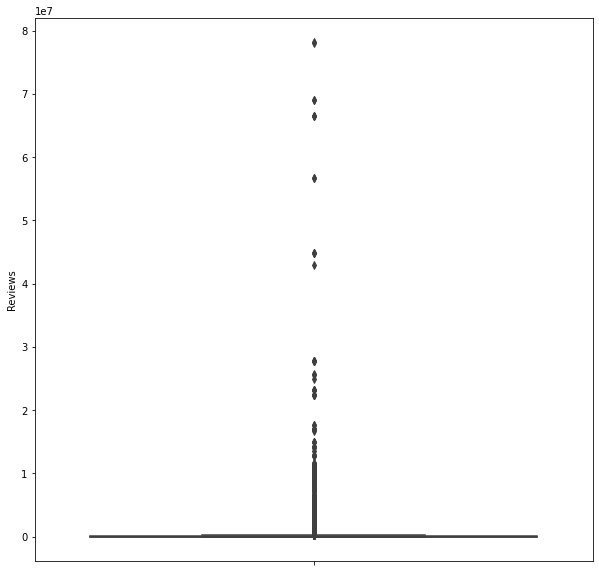

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,y=df["Reviews"]) 
plt.show()

We plot boxplot to check for outliers. From the boxplot, we see that Reviews column has outliers. Now we apply log transformation to Reviews column to handle outliers.

In [28]:
df["Reviews"]=np.log(df["Reviews"])

In [30]:
df["Reviews"]

0         5.068904
1         6.874198
2        11.379508
3        12.281384
4         6.874198
           ...    
10834     1.945910
10836     3.637586
10837     1.386294
10839     4.736198
10840    12.894978
Name: Reviews, Length: 8892, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


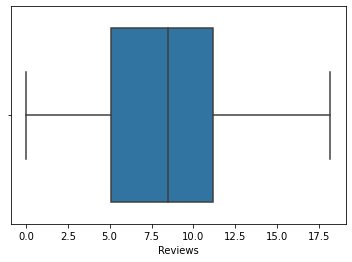

In [31]:
sns.boxplot(df["Reviews"])
plt.show()

#### Checking the Size column

In [32]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

 We see that Size column contains alphanumeric values. We convert these columns to numeric datatype by making appropriate conversions. Also we drop the rows for which Size column is "Varies with device".

In [33]:
df.drop(df[df["Size"]=="Varies with device"].index,inplace=True)

In [34]:
def size_change(x):
    if "M" in x:
        return float(x.replace("M",""))*1000000
    elif "k" in x:
        return float(x.replace("k",""))*1000
    else:
        return float(x)

In [35]:
df["Size"]=df["Size"].apply(size_change)

In [36]:
df["Size"]

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

#### Checking the Installs column.

In [37]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [38]:
df["Installs"]=df["Installs"].apply(lambda x:float(x.replace(",","").replace("+","")))

In [39]:
df["Installs"]

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10833        1000.0
10834         500.0
10836        5000.0
10837         100.0
10840    10000000.0
Name: Installs, Length: 7424, dtype: float64

#### Checking the Price column.

In [40]:
df["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [41]:
df["Price"]=df["Price"].apply(lambda x:float(x.replace('$','')))

In [42]:
df.rename(columns={"Price":"Price(in $)"},inplace=True)

In [43]:
df["Price(in $)"].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

#### Dropping the columns-'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' which are redundant for the analysis.

In [44]:
df.drop(['App','Rating','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [45]:
df

,Category,Reviews,Size,Installs,Type,Price(in $),Content Rating,Rating_Category
0,ART_AND_DESIGN,5.068904,19000000.0,10000.0,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000.0,500000.0,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000.0,5000000.0,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000.0,50000000.0,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000.0,100000.0,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.784190,619000.0,1000.0,Free,0.0,Everyone,High
10834,FAMILY,1.945910,2600000.0,500.0,Free,0.0,Everyone,High
10836,FAMILY,3.637586,53000000.0,5000.0,Free,0.0,Everyone,High
10837,FAMILY,1.386294,3600000.0,100.0,Free,0.0,Everyone,High


#### Encoding categorical data.

In [54]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [47]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [48]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [49]:
df["Rating_Category"].unique()

array(['High', 'Low'], dtype=object)

We note that - Category,Type,Content Rating,Rating_Category columns contain nominal categorical data. We encode these columns using one hot encoding method.

In [56]:
df=pd.get_dummies(df,columns=["Category","Type","Content Rating","Rating_Category"],drop_first=True)

In [57]:
df

,Reviews,Size,Installs,Price(in $),Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating_Category_Low
0,5.068904,19000000.0,10000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,6.874198,14000000.0,500000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,11.379508,8700000.0,5000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12.281384,25000000.0,50000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6.874198,2800000.0,100000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.784190,619000.0,1000.0,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10834,1.945910,2600000.0,500.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10836,3.637586,53000000.0,5000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10837,1.386294,3600000.0,100.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Segregating the target and independent features.

We consider Rating Category as target feature and rest of the columns as independent features

In [58]:
X=df.drop("Rating_Category_Low",axis=1) #Independent features

In [59]:
X.head()

,Reviews,Size,Installs,Price(in $),Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.068904,19000000.0,10000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.874198,14000000.0,500000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11.379508,8700000.0,5000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,12.281384,25000000.0,50000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.874198,2800000.0,100000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [60]:
y=df[["Rating_Category_Low"]] #Target feature

In [62]:
y.head()

,Rating_Category_Low
0,0
1,0
2,0
3,0
4,0


#### Splitting the dataset into train and test.

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [65]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5196, 42) (2228, 42)
(5196, 1) (2228, 1)


In [66]:
X_train.head()

,Reviews,Size,Installs,Price(in $),Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
6799,5.062595,26000000.0,50000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
428,12.158000,11000000.0,10000000.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3304,9.424484,5300000.0,1000000.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5662,2.833213,14000000.0,1000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3714,10.561784,89000000.0,1000000.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [67]:
X_test.head()

,Reviews,Size,Installs,Price(in $),Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
1867,12.321693,81000000.0,5000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4414,4.382027,7600000.0,10000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
116,4.304065,2900000.0,10000.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7608,10.575232,98000000.0,1000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9463,10.794071,68000000.0,5000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
y_train.head()

,Rating_Category_Low
6799,0
428,0
3304,0
5662,1
3714,0


In [69]:
y_test.head()

,Rating_Category_Low
1867,0
4414,0
116,0
7608,0
9463,0


####  Standardizing the data.

In [74]:
df1_train=X_train.loc[:,["Size","Installs"]]

In [75]:
df1_train

,Size,Installs
6799,26000000.0,50000.0
428,11000000.0,10000000.0
3304,5300000.0,1000000.0
5662,14000000.0,1000.0
3714,89000000.0,1000000.0
...,...,...
7754,1500000.0,50.0
7795,6700000.0,50000.0
7988,13000000.0,500000.0
1446,34000000.0,10000000.0


In [76]:
df1_test=X_test.loc[:,["Size","Installs"]]

In [78]:
df1_test

,Size,Installs
1867,81000000.0,5000000.0
4414,7600000.0,10000.0
116,2900000.0,10000.0
7608,98000000.0,1000000.0
9463,68000000.0,5000000.0
...,...,...
6666,30000000.0,5000000.0
5645,45000000.0,100000.0
457,30000000.0,1000000.0
4151,7900000.0,100000000.0


In [73]:
std_scale=StandardScaler()

In [79]:
std_scale.fit(df1_train)

StandardScaler()

In [80]:
df1_train_scaled=std_scale.transform(df1_train)
df1_test_scaled=std_scale.transform(df1_test)

In [86]:
df1_train_scaled

array([[ 0.13906904, -0.16736566],
       [-0.50074741,  0.04580871],
       [-0.74387767, -0.14701233],
       ...,
       [-0.41543855, -0.15772461],
       [ 0.48030449,  0.04580871],
       [ 0.86419436, -0.16842618]])

In [84]:
X_train.drop(["Size","Installs"],axis=1,inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [85]:
X_train.insert(1,"Size_Scaled",df1_train_scaled[:,0])

In [88]:
X_train.insert(2,"Installs_Scaled",df1_train_scaled[:,1])

In [89]:
X_train

,Reviews,Size_Scaled,Installs_Scaled,Price(in $),Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
6799,5.062595,0.139069,-0.167366,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
428,12.158000,-0.500747,0.045809,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3304,9.424484,-0.743878,-0.147012,0.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5662,2.833213,-0.372784,-0.168415,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3714,10.561784,2.826298,-0.147012,0.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,2.833213,-0.905965,-0.168436,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7795,7.791523,-0.684161,-0.167366,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7988,9.704488,-0.415439,-0.157725,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1446,12.943014,0.480304,0.045809,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [91]:
X_test.drop(["Size","Installs"],axis=1,inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
df1_test_scaled

array([[ 2.48506272, -0.06131409],
       [-0.64577248, -0.16822264],
       [-0.8462483 , -0.16822264],
       ...,
       [ 0.30968677, -0.14701233],
       [-0.63297615,  1.97401915],
       [ 2.8689526 , -0.16629443]])

In [93]:
X_test.insert(1,"Size_Scaled",df1_test_scaled[:,0])

In [94]:
X_test.insert(2,"Installs_Scaled",df1_test_scaled[:,1])

In [95]:
X_test

,Reviews,Size_Scaled,Installs_Scaled,Price(in $),Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
1867,12.321693,2.485063,-0.061314,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4414,4.382027,-0.645772,-0.168223,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
116,4.304065,-0.846248,-0.168223,0.00,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7608,10.575232,3.210188,-0.147012,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9463,10.794071,1.930555,-0.061314,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666,11.234784,0.309687,-0.061314,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5645,9.964865,0.949503,-0.166294,2.99,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
457,11.716642,0.309687,-0.147012,0.00,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4151,13.661444,-0.632976,1.974019,0.00,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
